In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
T2Hfile = pd.ExcelFile('https://inventory.data.gov/dataset/58fa1cd3-c1bf-4492-964d-f994b26a6cae/resource/f6d8dd83-3080-470f-b453-03f8ead0228f/download/time-to-hire-data-file.xlsx')

In [3]:
# Create dataframe
df = pd.DataFrame(T2Hfile.parse('TimetoHire1-15-2010 (1)'))

In [4]:
df

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B
5,*(TFM) Federal Sys Integ & Mgmt Ctr (ABOLISHED),CO,040057819MP,1,1,2004-10-12,2004-10-12,2004-10-13,2004-10-26,2004-11-03 00:00:00,2004-11-03,2004-11-03,"Alexandria, VA",2004-11-28,1102A
6,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A
7,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A
8,(7P) Office of the Assist. Regional Administra...,7,471321,79,1,2004-09-06,2004-09-07,2004-09-07,2004-09-28,2004-10-13 00:00:00,2004-11-16,2004-11-16,"Fort Worth, TX",2004-11-28,0301Y
9,(7P) Office of the Assist. Regional Administra...,7,471821,57,1,2004-09-15,2004-09-16,2004-09-16,2004-10-04,2004-10-18 00:00:00,2004-11-02,2004-11-04,"Fort Worth, TX",2004-11-29,1102F


In [5]:
# First four of the job series, convert to integer and then to string
def clean(x):
    j = []
    if len(x) == 3: 
        for i in x:
                j.append(i)
        j.insert(0,'0')           
 
    else:                             
        for i in x:
            if not i.isalpha():
                j.append(i)
            else:
                break
                
    return(''.join(j))

df['SERIES'] = df['SERIES'].astype('str')
df['CLEAN_SERIES'] = df['SERIES'].apply(lambda x :clean(x))
df['CLEAN_SERIES'] = df['CLEAN_SERIES'].fillna(0)
df['CLEAN_SERIES'].unique()

array(['0301', '0343', '1102', '0808', '2210', '2030', '2003', '2150',
       '1176', '2010', '0303', '0201', '1170', '1101', '0391', '1670',
       '1104', '0203', '0501', '0510', '0800', '0560', '0809', '0801',
       '0318', '1008', '0360', '1105', '0340', '0856', '1106', '2005',
       '0561', '0000', '1171', '1035', '0080', '0802', '1001', '1320',
       '2001', '0804', '0437', '0018', '5306', '2102', '1601', '0028',
       '0950', '1071', '0344', '0830', '1811', '0341', '0544', '0503',
       '0850', '0511', '0361', '0810', '2130', '1910', '1130', '0690',
       '0525', '2101', '1082', '1107', '0260', '0505', '0828', '0326',
       '0305', '1640', '0342', '2032', '0086', '1301', '1515'], dtype=object)

In [6]:
# Calculate time to hire dimension
df['T2H_days'] = pd.Series(delta.days for delta in (df['HIRED_DATE'] - df['RECEIVED_DATE']))

# Create year hired
df['HIRED_DATE_CY'] = df['HIRED_DATE'].dt.year.apply(str)

# subset T2H with positive values
# df = df[(df.T2H_days >= 0) & (df.HIRE_COUNT > 0)] 
df = df[(df['T2H_days'] >= 0) & (df['HIRE_COUNT'] > 0)] 
df.describe()
pd.crosstab(df.HIRED_DATE_CY, df.HIRE_COUNT, margins=True) 

### crosstab - https://chrisalbon.com/python/pandas_crosstabs.html

# subset for 1101s, 1102s
df11xxANOVA = df[(df.CLEAN_SERIES == "1101") | (df.CLEAN_SERIES == "1102")]
pd.crosstab(df11xxANOVA.CLEAN_SERIES, df11xxANOVA.HIRE_COUNT, margins=True)

df1102 = df[df.CLEAN_SERIES == "1102"]
pd.crosstab(df1102.HIRED_DATE_CY, df1102.HIRE_COUNT, margins=True)

HIRE_COUNT,1,2,3,4,5,All
HIRED_DATE_CY,,,,,,
2004,10,2,0,0,0,12
2005,138,90,68,56,270,622
2006,29,27,8,44,0,108
2007,44,24,14,0,8,90
2008,36,19,12,2,0,69
2009,50,42,6,3,5,106
2010,1,0,0,0,0,1
All,308,204,108,105,283,1008


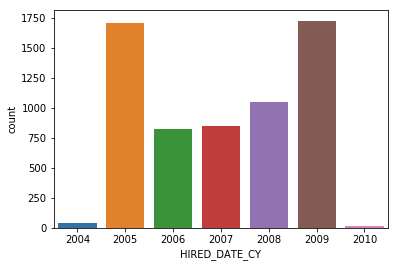

In [10]:
#Comparison - column graph
import seaborn as sns
sns.countplot(x = 'HIRED_DATE_CY', data = df)

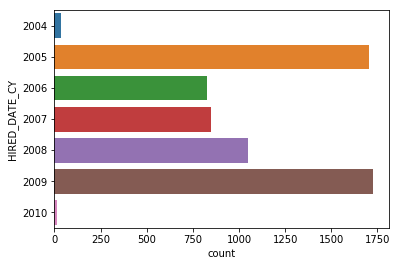

In [11]:
sns.countplot(y = 'HIRED_DATE_CY' , data = df)

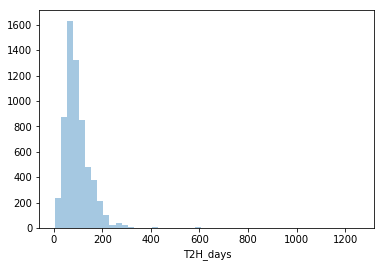

In [12]:
#histogram-T2H Overall using pandas
sns.distplot(df['T2H_days'],kde=False)

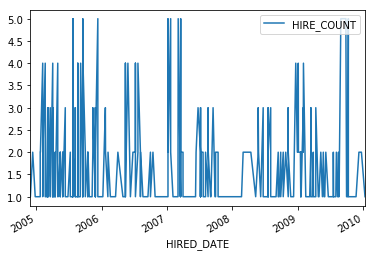

In [13]:
df1102.plot.line(x = 'HIRED_DATE', y = 'HIRE_COUNT')

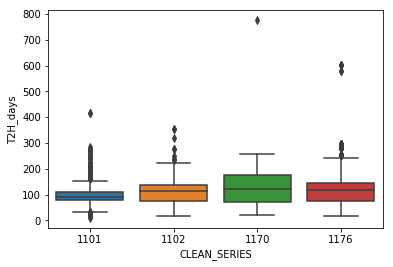

In [14]:
#box & whisker for 11xx series

#dfBox = df[(df.series_clean == "1101") | (df.series_clean == "1102") |(df.series_clean == "1170")|(df.series_clean == "1176") ]
sns.boxplot(x = 'CLEAN_SERIES', y = 'T2H_days',data = df[(df.CLEAN_SERIES == "1101") | (df.CLEAN_SERIES == "1102") |(df.CLEAN_SERIES == "1170")|(df.CLEAN_SERIES == "1176") ])


/Users/ptsag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


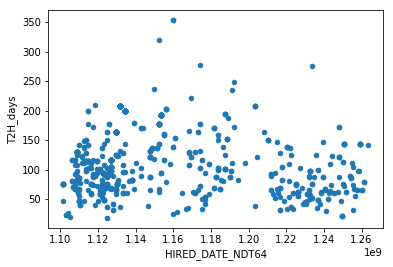

In [16]:
#Python is not very good at handling date datatypes. 
#This converts the dates into unix time code which is the number of seconds since Jan 1st 1970.  

from datetime import datetime
import calendar 
newarr=[]

for dt64 in df1102['HIRED_DATE']:
    imadt = dt64.to_pydatetime()
    newarr.append(calendar.timegm(imadt.timetuple()))
df1102['HIRED_DATE_NDT64'] = newarr
df1102.plot.scatter(x='HIRED_DATE_NDT64',y='T2H_days' )

